퍼셉트론 예제

In [ ]:
import numpy as np

단층 퍼셉트론 구현

In [ ]:
#AND Gate
def AND(x1, x2):
  w1, w2, theta = 1.0, 1.0, 1.4
  temp = x1*w1 + x2*w2

  if temp <= theta:
    return 0
  else:
    return 1

In [ ]:
data = [(0,0), (1,0), (0,1), (1,1)]
for datum in data:
  y = AND(datum[0], datum[1])
  print(f"{datum} -> {y}")

(0, 0) -> 0
(1, 0) -> 0
(0, 1) -> 0
(1, 1) -> 1


In [ ]:
#AND Gate - 편향값 적용

def AND(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.7
  #temp = np.sum(x*w) + b
  temp = np.dot(x,w) + b #행렬 내적
  if temp <= 0:
    return 0
  else:
    return 1

In [ ]:
data = [(0,0), (1,0), (0,1), (1,1)]
for datum in data:
  y = AND(datum[0], datum[1])
  print(f"{datum} -> {y}")

(0, 0) -> 0
(1, 0) -> 0
(0, 1) -> 0
(1, 1) -> 1


In [ ]:
#NAND Gate
def NAND(x1,x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.7

  temp = np.dot(x,w) + b
  if temp <= 0:
    return 1
  else:
    return 0

In [ ]:
data = [(0,0), (1,0), (0,1), (1,1)]
for datum in data:
  y = NAND(datum[0], datum[1])
  print(f"{datum} -> {y}")

(0, 0) -> 1
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


In [ ]:
#OR Gate
def OR(x1, x2):
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.2

  temp = np.dot(x,w) + b
  if temp <= 0:
    return 0
  else:
    return 1

In [ ]:
data = [(0,0), (1,0), (0,1), (1,1)]
for datum in data:
  y = OR(datum[0], datum[1])
  print(f"{datum} -> {y}")

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 1


In [ ]:
#XOR Gate
def XOR(x1, x2):
  s1 = NAND(x1, x2)
  s2 = OR(x1, x2)
  y= AND(s1, s2)
  return y

In [ ]:
data = [(0,0), (1,0), (0,1), (1,1)]
for datum in data:
  y = XOR(datum[0], datum[1])
  print(f"{datum} -> {y}")

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


In [ ]:
#시그모이드 함수 - 이진분류에 많이 사용: 0에 가까우면 0, 1에 가까우면 1
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [ ]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

다층 퍼셉트론

In [ ]:
#가중치 관리 및 생성 모델
def init_network():
  network = {}
  network['w1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) #차원 중요!!!
  network['b1'] = np.array([0.1, 0.2, 0.3])
  network['w2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network['b2'] = np.array([0.1, 0.2])
  network['w3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network['b3'] = np.array([0.1, 0.2])

  return network


def forward(network, x):
  w1, w2, w3 = network['w1'], network['w2'], network['w3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, w1)+ b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, w2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, w3) + b3
  y = a3

  return y

In [ ]:
network = init_network()
x = np.array([[1.0, 0.5]])
y = forward(network, x)
print(y)

[[0.31682708 0.69627909]]


In [ ]:
def softmax(x):
  exp_x = np.exp(x)
  sum_exp_x = sum(exp_x)
  y = exp_x / sum_exp_x
  return y

In [ ]:
print(softmax([1, 2, 0]))

[0.24472847 0.66524096 0.09003057]


MNIST 손글씨 이미지 예측

In [ ]:
#784 = 이미지 하나에 대한 데이터 갯수
#60000 = 784같은 데이터가 60000개 있는 것; 쉽게 말하면 픽셀 갯수

import pickle
def load_mnist(normalize=True, flatten=True, one_hot_label=False):
  def _change_one_hot_label(X):
    T = np.zeros((X.size, 10))
    for idx, row in enumerate(T): #60000개의 row를 하나씩 던져줌
      row[X[idx]] = 1 #label에 해당하는 값에 1 - 0000010000 이런식으로 만들어주기

    return T

  with open('/content/drive/MyDrive/mnist.pkl', 'rb') as f:
    dataset = pickle.load(f)

  if normalize: #이미지 읽어서 정규화
    for key in ('train_img', 'test_img'):
      dataset[key] = dataset[key].astype(np.float32)
      dataset[key] /= 255.0 #기존 데이터는 0-256까지 정수값 가지고 있음 ->0~1사이 값으로 표현

  if one_hot_label: #one-hot encoding
    dataset['train_label'] = _change_one_hot_label(dataset['train_label'])
    #60000개 숫자를 10개로 만들어줌

  if not flatten:
    for key in ('train_img', 'test_img'):
      dataset[key] = dataset[key].reshape(-1, 1, 28, 28)
      #dataset[key].shape =>(60000, 784) 만들어줘야 함
      #reshape(샘플개수, 채널개수, width, height)
      #흑백이라 1
      #이런 이미지가 60000개 있는 것

  return (dataset['train_img'], dataset['train_label']), (dataset['test_img'], dataset['test_label'])

In [ ]:
(x_train, y_train), (x_test, y_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)

In [ ]:
import pickle
with open('/content/drive/MyDrive/mnist.pkl', 'rb') as f:
    dataset = pickle.load(f)
    print(dataset.keys())

dict_keys(['train_img', 'train_label', 'test_img', 'test_label'])


In [ ]:
dataset['train_label'][0]

5

In [ ]:
import numpy as np

for key in ('train_img', 'test_img'):
  dataset[key] = dataset[key].astype(np.float32)
  dataset[key] /= 255.0

In [ ]:
def _change_one_hot_label(X):
    T = np.zeors((X.size, 10))
    for idx, row in enumerate(T):
      row[X[idx]] = 1

    return T

In [ ]:
dataset['train_label'].shape

(60000,)

In [ ]:
dataset['train_img'].reshape(-1,1,28,28)[0]

In [ ]:
#local에서 시각화
#(x_train, y_train), (x_test, y_test) = load_mnist(normalize=False, flatten=True, one_hot_label=False)
#from PIL import Image

#img = x_train[0]
#label = y_train[0]
#print(label)

#print(img.shape)
#img = img.reshape(28, 28)
#print(img.shape)

#pil_img = Image.fromarray(np.uint8(img))
#pil_img.show()

5
(784,)
(28, 28)


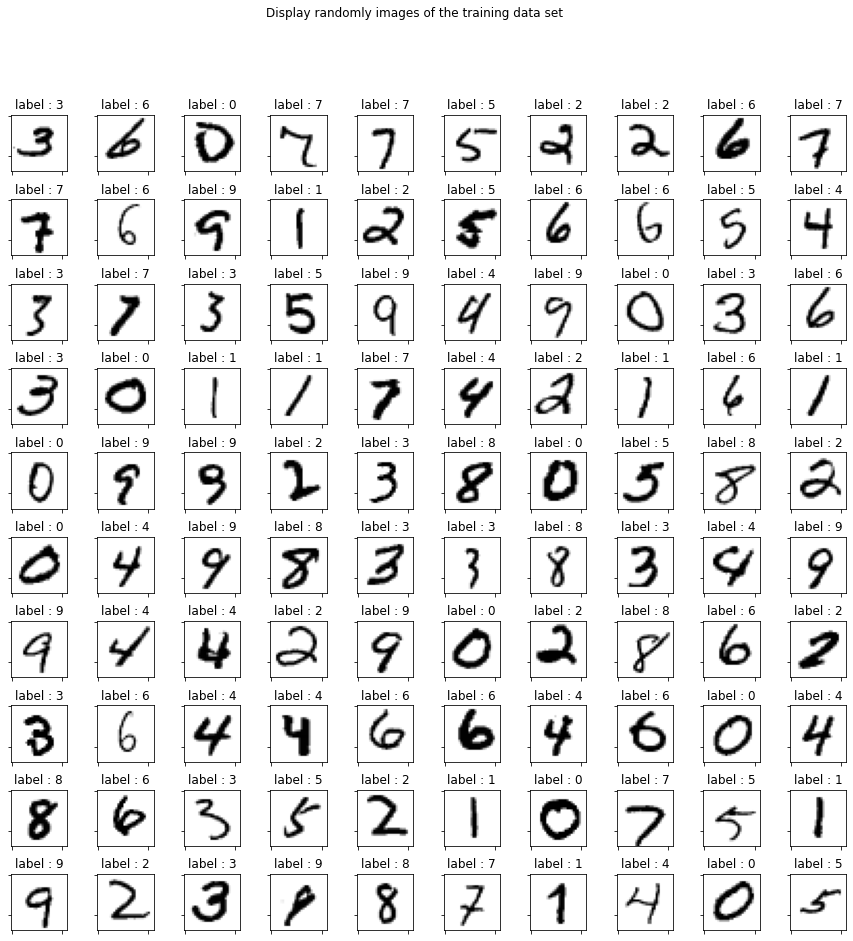

In [ ]:
import matplotlib.pyplot as plt

def displayData(X, Y):
  fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(15,15))
  fig.suptitle("Display randomly images of the training data set")

  for i in range(10):
    for j in range(10):
      ind = np.random.randint(X.shape[0])
      tmp =X[ind, :].reshape(28,28)
      ax[i,j].set_title("label : {}".format(Y[ind]))
      ax[i,j].imshow(tmp, cmap='gray_r')
      plt.setp(ax[i,j].get_xticklabels(), visible=False)
      plt.setp(ax[i,j].get_yticklabels(), visible=False)
  
  fig.subplots_adjust(hspace=0.5, wspace=0.5)

displayData(x_train, y_train)

손글씨 예측 예제

In [ ]:
def init_network():
  with open("/content/drive/MyDrive/sample_weight.pkl.pkl의 사본", 'rb') as f:
    network = pickle.load(f)

  return network

def predict(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1 #순서 매우 중요!! 행렬 차수 맞춰줘야 함
  z1 = sigmoid(a1)

  a2 = np.dot(z1, W2) + b2 #위의 결과값이 입력값으로 들어옴
  z2 = sigmoid(a2)

  a3 = np.dot(z2, W3) + b3
  y = softmax(a3) #0에서 1의 값으로 만들기

  return y

In [ ]:
model = init_network()

In [ ]:
model.keys()

dict_keys(['b2', 'W1', 'b1', 'W2', 'W3', 'b3'])

In [ ]:
model['W1'].shape #(입력 개수, 첫번째 히든레이어(layer1) 노드개수)

(784, 50)

In [ ]:
model['W2'].shape #(입력개수, 히든레이어 노드개수)
#layer1의 노드개수=50 & layer2의 노드개수=100

(50, 100)

In [ ]:
model['W3'].shape #(입력개수, 출력 개수)

(100, 10)

In [ ]:
model['b1'].shape #layer1 노드 개수와 개수 똑같아야 함

(50,)

In [ ]:
model['b2'].shape

(100,)

In [ ]:
model['b3'].shape

(10,)

In [ ]:
x_test.shape

(10000, 784)

In [ ]:
%%time
#학습하지 않은 x_test에 대해 예측(하나하나씩 검사) - 10000번 연산
network = init_network()
accuracy_cnt = 0
batch_size = 100

for i in range(len(x_test)): #10000개를 하나씩 돌면서 784개 던지는 것
  y = predict(model, x_test[i]) #x_test: 이미지
  p = np.argmax(y) #가장 큰 애가 포함된 값의 인덱스 가져오기
  if p == y_test[i]: #y_test: 라벨
    accuracy_cnt += 1

print("Accuracy : {}".format(accuracy_cnt/len(x_test)))
#비효율적

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy : 0.9207
CPU times: user 724 ms, sys: 586 ms, total: 1.31 s
Wall time: 678 ms


에폭과 배치

In [ ]:
%%time
#train 시 데이터 너무 많은 경우 사용(100개 한꺼번에 검사)
#100개 묶음 100번 연산!
network = init_network()
accuracy_cnt = 0
batch_size = 100

for i in range(0, len(x_test), batch_size):
  x_batch = x_test[i:i+batch_size]
  y_batch = predict(network, x_batch)

  p = np.argmax(y_batch, axis=1) #10개 열 중 가장 높은 애 찾아야 하므로 axis=1
  accuracy_cnt += np.sum(p == y_test[i:i+batch_size])

print("Accuracy : {}".format(accuracy_cnt/len(x_test)))
#하나씩 검사할 때보다 성능은 약간 떨어지지만 속도 빨라짐

Accuracy : 0.9135
CPU times: user 102 ms, sys: 96.3 ms, total: 198 ms
Wall time: 107 ms


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
